# Analysis and Visualisation



For accurate analysis, we use the original dataset for the actual values of money, which existed before we altered their values and distributions in the previous explroatory data analysis.

In [1]:
import sys
sys.path.insert(0, ".")

from pathlib import Path
import db_utils
import pandas as pd

db_utils

df = pd.read_csv('loan_payments.csv')
df

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.00,0.00,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.00,0.00,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.00,0.00,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.00,0.00,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.00,0.00,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,...,0.00,0.00,Jul-2016,160.61,NaN,Jul-2016,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,...,0.00,0.00,Oct-2016,490.01,NaN,Sep-2016,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,...,0.00,0.00,Sep-2016,110.58,Sep-2016,May-2013,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,...,0.00,0.00,Mar-2014,0.00,NaN,May-2013,NaN,NaN,1,INDIVIDUAL


## Current State of the Loans




We will query the data to check the current state of the payments:

What percentage of the loans are recovered against the investor funding and the total amount funded?

We can visualise the results on a scatter graph.



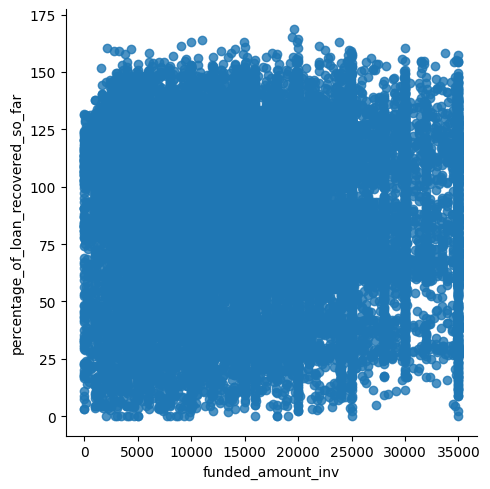

In [3]:
import seaborn as sns

# from Plotter import Plotter
# plotter_instance = Plotter()

# for each row in df:
#     percentage_of_loan_recovered_so_far = 100*total_payment/loan_amount
#     total_funded = funded_amount + funded_amount_inv

df['percentage_of_loan_recovered_so_far'] = 100*df.total_payment/df.loan_amount

# print('percentage_of_loan_recovered_so_far:')
# print(percentage_of_loan_recovered_so_far)

# plotter_instance.scattergraph(df, df.funded_amount , percentage_of_loan_recovered_so_far)


sns.lmplot(data=df, x='funded_amount_inv', y='percentage_of_loan_recovered_so_far')

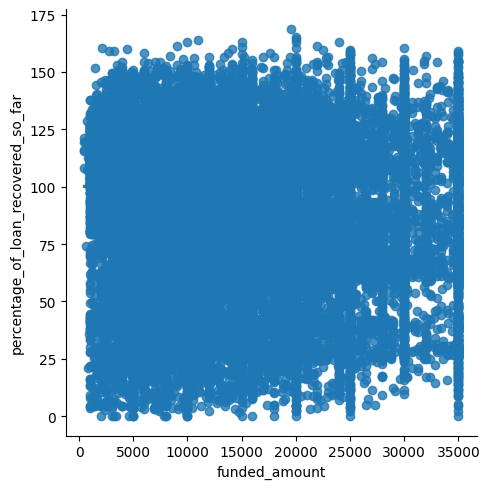

In [3]:
sns.lmplot(data=df, x='funded_amount', y='percentage_of_loan_recovered_so_far')

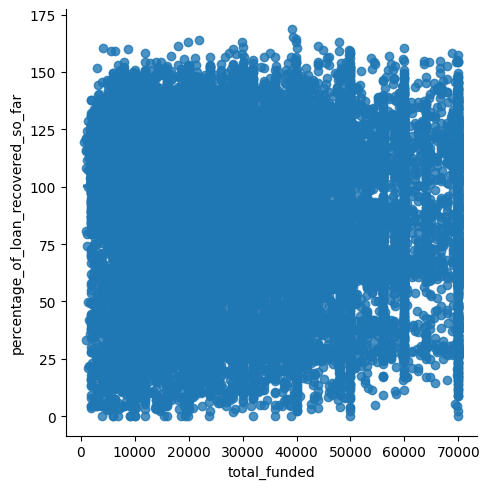

In [4]:
df['total_funded'] = df.funded_amount + df.funded_amount_inv

sns.lmplot(data=df, x='total_funded', y='percentage_of_loan_recovered_so_far')

We can also visualise what percentage of the total amount would be recovered up to 6 months' in the future:

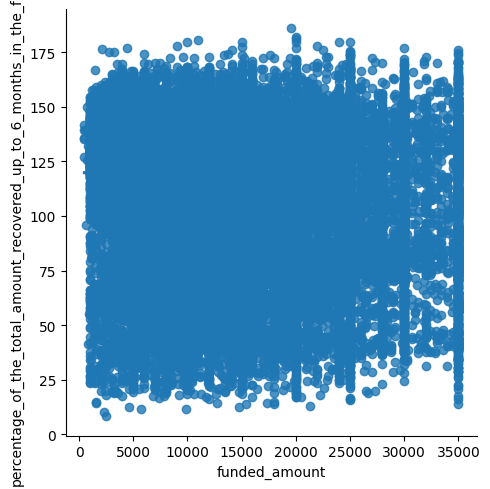

In [5]:
df['percentage_of_the_total_amount_recovered_up_to_6_months_in_the_future'] = 100*(df.total_payment+df.instalment*6)/df.loan_amount

# plotter_instance.scattergraph(df.loan_amount, percentage_of_the_total_amount_recovered_up_to_6_months_in_the_future)

sns.lmplot(data=df, x='funded_amount', y='percentage_of_the_total_amount_recovered_up_to_6_months_in_the_future')


## Calculating Loss

The company wants to check what percentage of loans have been a loss to the company.

Loans marked as Charged Off in the loan_status column represent a loss to the company.

In [6]:
100*df['loan_status'].value_counts()['Charged Off']/df['id'].count()


10.272722243735133

Approximately 10% of loans have historically become Charged Off.

In [7]:
# createa mask of rows that have been charged-off
charged_off_index_list = df.index[df['loan_status'] == 'Charged Off']

# then find the sum of total_payment ofr thsoe rows
sum(df.total_payment[charged_off_index_list])

37400589.04081948

The total amount that was paid towards these loans before being charged off is 37,400,589

## Calculating Projected Loss

We can calculate the projected loss of the loans marked as Charged Off:

In [8]:
df.loan_amount - df.out_prncp

0         2470.30
1         4097.17
2        16000.00
3        15000.00
4         4702.53
           ...   
54226     5000.00
54227     5000.00
54228     3500.00
54229     5000.00
54230     5000.00
Length: 54231, dtype: float64

In [9]:
df.out_prncp[charged_off_index_list]

7        0.0
56       0.0
83       0.0
90       0.0
117      0.0
        ... 
54152    0.0
54156    0.0
54180    0.0
54194    0.0
54198    0.0
Name: out_prncp, Length: 5571, dtype: float64

In [10]:
df.loan_amount[charged_off_index_list]

7        26500
56       11200
83        1325
90        8150
117       7000
         ...  
54152     8000
54156     2125
54180     2500
54194     1000
54198    20000
Name: loan_amount, Length: 5571, dtype: int64

In [11]:
df.total_rec_prncp[charged_off_index_list]

7         1197.35
56         885.52
83         176.69
90        1045.20
117        321.84
           ...   
54152     5717.45
54156      943.58
54180     1730.83
54194      544.02
54198    16077.42
Name: total_rec_prncp, Length: 5571, dtype: float64

In [12]:
df.loan_amount[charged_off_index_list] - df.total_rec_prncp[charged_off_index_list]

7        25302.65
56       10314.48
83        1148.31
90        7104.80
117       6678.16
           ...   
54152     2282.55
54156     1181.42
54180      769.17
54194      455.98
54198     3922.58
Length: 5571, dtype: float64

In [13]:
df.loan_amount[charged_off_index_list] - df.total_payment[charged_off_index_list]

7        22317.730000
56        9293.490000
83        1042.220000
90        6341.950000
117       5345.860000
             ...     
54152      705.350000
54156     -455.248838
54180      413.370000
54194      296.050000
54198     -339.660000
Length: 5571, dtype: float64

We can changes the categrories of the term lengths into integers:

In [14]:
set(df.term)

{'36 months', '60 months', nan}

In [15]:
# df['term'][charged_off_index_list] = df['term'][charged_off_index_list].astype(str)

# df['term'][charged_off_index_list] = df['term'][charged_off_index_list].str.replace(' months', '')

# df['term'][charged_off_index_list] = df['term'][charged_off_index_list].astype(int)

In [16]:
df['term'] = df['term'].astype(str)

# df['term'] = df['term'].str.replace(' months', '')

df['term'] = df['term'].map(lambda x: x.rstrip(' months') if x != 'nan' else False)

df['term'] = df['term'].astype(int)

In [17]:
# df['how_much_the_borrower_must_pay_in_total'] = df.apply(lambda row : row['term'] * row['instalment'])

df['how_much_the_borrower_must_pay_in_total'] = df.term * df.instalment

# df = df.assign(how_much_the_borrower_must_pay_in_total = lambda x : x.term * x.instalment)

In [18]:

    
df['amount_left_to_pay'] = df.how_much_the_borrower_must_pay_in_total[charged_off_index_list] - df.total_payment[charged_off_index_list]

sum(df.how_much_the_borrower_must_pay_in_total[charged_off_index_list] - df.total_payment[charged_off_index_list] - df.loan_amount[charged_off_index_list])

# sum(df.amount_left_to_pay)

-19685805.08081952


The revenue that the Charged Off loans would have generated for the company if they had finished their term is 56,673,594

We can visualise the loss projected over the remaining term of these loans.

We transform the data into dates to make it easier to deal with as amounts of months.

In [19]:
from DataTransform import DataTransform
df_transforming_instance = DataTransform()

for column_name in ('issue_date', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date'):
            df = df_transforming_instance.date_convert(df, column_name)

We can determine over what duration each borrower actually sent payments for their loan:

In [20]:

#  y-axis is 
df['how_much_the_charged_off_borrower_must_pay_in_total'] = df.how_much_the_borrower_must_pay_in_total[charged_off_index_list]

# # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# print(df.last_payment_date - df.issue_date)

# f = pd.Timedelta(df.last_payment_date - df.issue_date).to_period('M')

# print(f)
df['actual_payment_duration'] = df.last_payment_date - df.issue_date

df['actual_payment_duration']


0        365 days
1        365 days
2        273 days
3        151 days
4        365 days
           ...   
54226   1096 days
54227   1096 days
54228   1127 days
54229    212 days
54230    243 days
Name: actual_payment_duration, Length: 54231, dtype: timedelta64[ns]

In [21]:

df['actual_payment_duration'] = df.actual_payment_duration[charged_off_index_list]

df['actual_payment_duration']


0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
54226   NaT
54227   NaT
54228   NaT
54229   NaT
54230   NaT
Name: actual_payment_duration, Length: 54231, dtype: timedelta64[ns]

In [22]:
print(set(df['actual_payment_duration']))

{NaT, Timedelta('1218 days 00:00:00'), Timedelta('181 days 00:00:00'), Timedelta('1642 days 00:00:00'), Timedelta('578 days 00:00:00'), Timedelta('426 days 00:00:00'), Timedelta('1614 days 00:00:00'), Timedelta('550 days 00:00:00'), Timedelta('1643 days 00:00:00'), Timedelta('1277 days 00:00:00'), Timedelta('1005 days 00:00:00'), Timedelta('944 days 00:00:00'), Timedelta('1158 days 00:00:00'), Timedelta('212 days 00:00:00'), Timedelta('485 days 00:00:00'), Timedelta('609 days 00:00:00'), Timedelta('337 days 00:00:00'), Timedelta('1006 days 00:00:00'), Timedelta('1673 days 00:00:00'), Timedelta('1216 days 00:00:00'), Timedelta('1033 days 00:00:00'), Timedelta('548 days 00:00:00'), Timedelta('487 days 00:00:00'), Timedelta('945 days 00:00:00'), Timedelta('668 days 00:00:00'), Timedelta('396 days 00:00:00'), Timedelta('1065 days 00:00:00'), Timedelta('1399 days 00:00:00'), Timedelta('1064 days 00:00:00'), Timedelta('792 days 00:00:00'), Timedelta('1247 days 00:00:00'), Timedelta('1461 day

In [23]:

df['actual_payment_duration'] = df['actual_payment_duration'].astype(int)




# x-axis is 
df['remaining_term_in_days'] = df.term*30 - df.actual_payment_duration

# (timedifference bwteen last_payment_date and issue_date)



# instalment * remainign term




In [24]:
df['term']*30

0        1080
1        1080
2        1080
3        1080
4        1080
         ... 
54226    1080
54227    1080
54228    1080
54229    1080
54230    1080
Name: term, Length: 54231, dtype: int64

In [25]:
df.iloc[0]

id                                                                                   38676116
member_id                                                                            41461848
loan_amount                                                                              8000
funded_amount                                                                          8000.0
funded_amount_inv                                                                      8000.0
term                                                                                       36
int_rate                                                                                 7.49
instalment                                                                             248.82
grade                                                                                       A
sub_grade                                                                                  A4
employment_length                                           

In [26]:
df['remaining_term_in_days']

0       -9223372036854774728
1       -9223372036854774728
2       -9223372036854774728
3       -9223372036854774728
4       -9223372036854774728
                ...         
54226   -9223372036854774728
54227   -9223372036854774728
54228   -9223372036854774728
54229   -9223372036854774728
54230   -9223372036854774728
Name: remaining_term_in_days, Length: 54231, dtype: int64

In [27]:
df['charged_off_remaining_term_in_days'] = df['remaining_term_in_days'][charged_off_index_list]

We can visualise the loss projected over the remaining term of these loans:

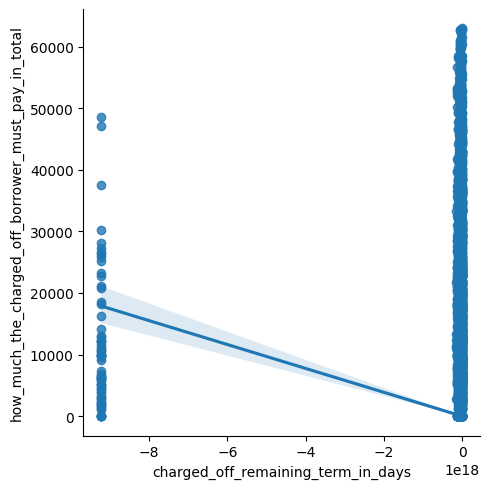

In [28]:

sns.lmplot(data=df, x='charged_off_remaining_term_in_days', y='how_much_the_charged_off_borrower_must_pay_in_total')

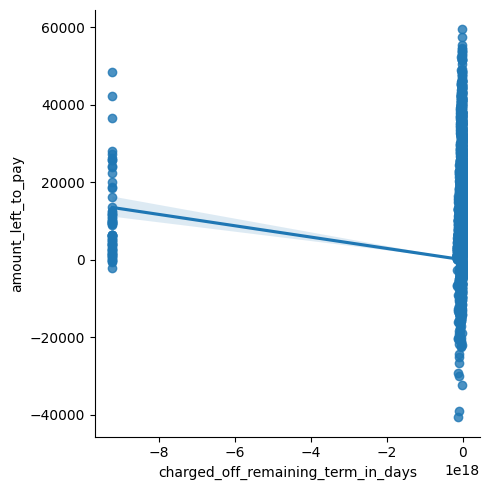

In [29]:

sns.lmplot(data=df, x='charged_off_remaining_term_in_days', y='amount_left_to_pay')

## Possible Loss

There are customers who are currently behind with their loan payments. This subset of customers represent a risk to company revenue.

What percentage do users in this bracket currently represent as a percentage of all loans? 

In [30]:
set(df.loan_status)

{'Charged Off',
 'Current',
 'Default',
 'Does not meet the credit policy. Status:Charged Off',
 'Does not meet the credit policy. Status:Fully Paid',
 'Fully Paid',
 'In Grace Period',
 'Late (16-30 days)',
 'Late (31-120 days)'}

In [31]:
set(df)

{'actual_payment_duration',
 'amount_left_to_pay',
 'annual_inc',
 'application_type',
 'charged_off_remaining_term_in_days',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'dti',
 'earliest_credit_line',
 'employment_length',
 'funded_amount',
 'funded_amount_inv',
 'grade',
 'home_ownership',
 'how_much_the_borrower_must_pay_in_total',
 'how_much_the_charged_off_borrower_must_pay_in_total',
 'id',
 'inq_last_6mths',
 'instalment',
 'int_rate',
 'issue_date',
 'last_credit_pull_date',
 'last_payment_amount',
 'last_payment_date',
 'loan_amount',
 'loan_status',
 'member_id',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'next_payment_date',
 'open_accounts',
 'out_prncp',
 'out_prncp_inv',
 'payment_plan',
 'percentage_of_loan_recovered_so_far',
 'percentage_of_the_total_amount_recovered_up_to_6_months_in_the_future',
 'policy_code',
 'purpose',
 'recoveries',
 'remaining_term_in_days',
 'sub_grade',
 'term',
 'tota

In [32]:
set(df.delinq_2yrs)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 18}

CUstmers who are behind wth their loan payemtns are on a payment plan???????????????/

In [33]:
df['payment_plan']

0        n
1        n
2        n
3        n
4        n
        ..
54226    n
54227    n
54228    n
54229    n
54230    n
Name: payment_plan, Length: 54231, dtype: object

In [34]:
set(df['payment_plan'])

{'n', 'y'}

In [35]:
df['payment_plan'].value_counts()['y']

1

In [36]:
100*df['payment_plan'].value_counts()['y']/df['id'].count()

0.0018439637845512715

Customers who have 30+ days past-due payment(s) in their credit file for the past two years are struggling to pay off their loan:

In [37]:
df['has_past_due_payments'] = df['delinq_2yrs']>0

# late_index_list

df['has_past_due_payments'] 


0         True
1        False
2        False
3        False
4        False
         ...  
54226     True
54227    False
54228    False
54229    False
54230    False
Name: has_past_due_payments, Length: 54231, dtype: bool

In [38]:

df['has_past_due_payments'].value_counts()[True]

late_payers_index_list = df.index[df['has_past_due_payments'] == True]

late_payers_index_list = list(late_payers_index_list)

late_payers_index_list

[0,
 5,
 12,
 16,
 17,
 36,
 38,
 43,
 48,
 54,
 55,
 59,
 63,
 66,
 69,
 73,
 74,
 78,
 89,
 114,
 117,
 120,
 123,
 127,
 130,
 131,
 138,
 142,
 146,
 153,
 154,
 157,
 158,
 163,
 164,
 171,
 181,
 183,
 184,
 189,
 190,
 191,
 192,
 194,
 199,
 207,
 211,
 213,
 215,
 216,
 223,
 225,
 229,
 230,
 232,
 239,
 240,
 255,
 272,
 274,
 278,
 302,
 303,
 309,
 316,
 319,
 320,
 331,
 343,
 347,
 350,
 354,
 356,
 358,
 367,
 369,
 375,
 393,
 398,
 399,
 406,
 410,
 425,
 434,
 437,
 439,
 440,
 441,
 444,
 446,
 451,
 455,
 457,
 473,
 486,
 493,
 507,
 516,
 518,
 522,
 524,
 539,
 540,
 544,
 547,
 548,
 565,
 567,
 575,
 578,
 579,
 586,
 587,
 588,
 607,
 615,
 620,
 623,
 645,
 646,
 650,
 660,
 662,
 672,
 684,
 692,
 705,
 709,
 711,
 713,
 715,
 727,
 741,
 742,
 744,
 745,
 747,
 749,
 755,
 758,
 759,
 762,
 765,
 766,
 770,
 779,
 780,
 816,
 817,
 828,
 830,
 832,
 833,
 835,
 842,
 850,
 851,
 855,
 860,
 864,
 865,
 877,
 879,
 880,
 892,
 903,
 906,
 924,
 929,
 932,
 

In [39]:

100*df['has_past_due_payments'].value_counts()[True]/df['id'].count()

15.858088547140934

We can calculate the total amount of customers in this bracket and how much loss the company would incur their status was changed to Charged Off. 

In [40]:
df['has_past_due_payments'].value_counts()[True]

8600

There are 8600 customers strugglign to pay off theri loans.

w much loss would the company  incur if these borrowers' statuses were changed to Charged Off?

In [41]:
sum(df.how_much_the_borrower_must_pay_in_total[late_payers_index_list] - df.total_payment[late_payers_index_list])

39744819.77335135

The company would incur a loss of 96,418,414 if these borrowers' statuses were changed to Charged Off.

What is the projected loss of these loans if the customer were to finish the full loans term?

In [42]:
df['how_much_the_late_payer_borrower_must_pay_in_total'] = df.how_much_the_borrower_must_pay_in_total[late_payers_index_list]

In [43]:
df['remaining_term_in_days']

0       -9223372036854774728
1       -9223372036854774728
2       -9223372036854774728
3       -9223372036854774728
4       -9223372036854774728
                ...         
54226   -9223372036854774728
54227   -9223372036854774728
54228   -9223372036854774728
54229   -9223372036854774728
54230   -9223372036854774728
Name: remaining_term_in_days, Length: 54231, dtype: int64

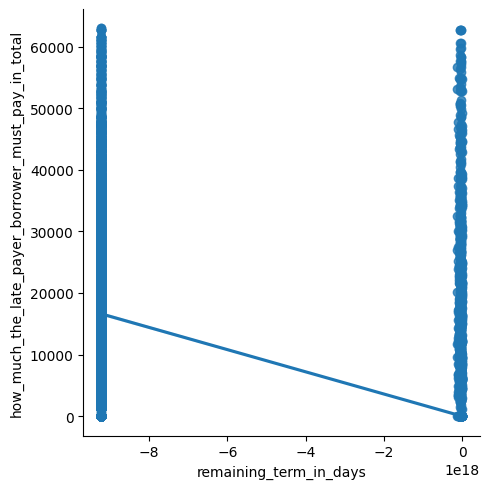

In [44]:

sns.lmplot(data=df, x='remaining_term_in_days', y='how_much_the_late_payer_borrower_must_pay_in_total')

If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?


In [45]:
late_payers_index_list

[0,
 5,
 12,
 16,
 17,
 36,
 38,
 43,
 48,
 54,
 55,
 59,
 63,
 66,
 69,
 73,
 74,
 78,
 89,
 114,
 117,
 120,
 123,
 127,
 130,
 131,
 138,
 142,
 146,
 153,
 154,
 157,
 158,
 163,
 164,
 171,
 181,
 183,
 184,
 189,
 190,
 191,
 192,
 194,
 199,
 207,
 211,
 213,
 215,
 216,
 223,
 225,
 229,
 230,
 232,
 239,
 240,
 255,
 272,
 274,
 278,
 302,
 303,
 309,
 316,
 319,
 320,
 331,
 343,
 347,
 350,
 354,
 356,
 358,
 367,
 369,
 375,
 393,
 398,
 399,
 406,
 410,
 425,
 434,
 437,
 439,
 440,
 441,
 444,
 446,
 451,
 455,
 457,
 473,
 486,
 493,
 507,
 516,
 518,
 522,
 524,
 539,
 540,
 544,
 547,
 548,
 565,
 567,
 575,
 578,
 579,
 586,
 587,
 588,
 607,
 615,
 620,
 623,
 645,
 646,
 650,
 660,
 662,
 672,
 684,
 692,
 705,
 709,
 711,
 713,
 715,
 727,
 741,
 742,
 744,
 745,
 747,
 749,
 755,
 758,
 759,
 762,
 765,
 766,
 770,
 779,
 780,
 816,
 817,
 828,
 830,
 832,
 833,
 835,
 842,
 850,
 851,
 855,
 860,
 864,
 865,
 877,
 879,
 880,
 892,
 903,
 906,
 924,
 929,
 932,
 

In [46]:
charged_off_index_list = list(charged_off_index_list)

charged_off_index_list

[7,
 56,
 83,
 90,
 117,
 138,
 149,
 190,
 209,
 314,
 336,
 362,
 395,
 431,
 502,
 558,
 564,
 577,
 590,
 613,
 634,
 708,
 744,
 789,
 807,
 824,
 835,
 866,
 871,
 874,
 897,
 949,
 959,
 967,
 984,
 1001,
 1057,
 1083,
 1092,
 1104,
 1195,
 1214,
 1217,
 1234,
 1252,
 1264,
 1301,
 1371,
 1404,
 1520,
 1526,
 1530,
 1569,
 1571,
 1607,
 1626,
 1628,
 1653,
 1658,
 1698,
 1745,
 1777,
 1820,
 1835,
 1842,
 1878,
 1909,
 1918,
 1960,
 1963,
 1994,
 2013,
 2027,
 2028,
 2052,
 2083,
 2143,
 2146,
 2152,
 2173,
 2214,
 2267,
 2274,
 2275,
 2301,
 2329,
 2365,
 2367,
 2420,
 2453,
 2483,
 2489,
 2508,
 2610,
 2642,
 2755,
 2759,
 2844,
 2924,
 2970,
 2993,
 3060,
 3080,
 3086,
 3094,
 3120,
 3237,
 3254,
 3298,
 3432,
 3450,
 3486,
 3492,
 3509,
 3518,
 3530,
 3551,
 3632,
 3656,
 3659,
 3684,
 3690,
 3718,
 3750,
 3770,
 3778,
 3795,
 3907,
 3930,
 3931,
 3934,
 3943,
 3963,
 3988,
 3992,
 4033,
 4069,
 4099,
 4113,
 4202,
 4223,
 4247,
 4263,
 4266,
 4297,
 4306,
 4307,
 4313,
 431

In [47]:
potential_total_charged_off_index_list = late_payers_index_list

potential_total_charged_off_index_list.extend(charged_off_index_list)

print(potential_total_charged_off_index_list)



[0, 5, 12, 16, 17, 36, 38, 43, 48, 54, 55, 59, 63, 66, 69, 73, 74, 78, 89, 114, 117, 120, 123, 127, 130, 131, 138, 142, 146, 153, 154, 157, 158, 163, 164, 171, 181, 183, 184, 189, 190, 191, 192, 194, 199, 207, 211, 213, 215, 216, 223, 225, 229, 230, 232, 239, 240, 255, 272, 274, 278, 302, 303, 309, 316, 319, 320, 331, 343, 347, 350, 354, 356, 358, 367, 369, 375, 393, 398, 399, 406, 410, 425, 434, 437, 439, 440, 441, 444, 446, 451, 455, 457, 473, 486, 493, 507, 516, 518, 522, 524, 539, 540, 544, 547, 548, 565, 567, 575, 578, 579, 586, 587, 588, 607, 615, 620, 623, 645, 646, 650, 660, 662, 672, 684, 692, 705, 709, 711, 713, 715, 727, 741, 742, 744, 745, 747, 749, 755, 758, 759, 762, 765, 766, 770, 779, 780, 816, 817, 828, 830, 832, 833, 835, 842, 850, 851, 855, 860, 864, 865, 877, 879, 880, 892, 903, 906, 924, 929, 932, 953, 957, 960, 961, 987, 994, 995, 996, 998, 1003, 1011, 1016, 1018, 1021, 1022, 1025, 1030, 1038, 1039, 1043, 1052, 1056, 1061, 1063, 1068, 1069, 1072, 1074, 1077, 1083,

In [48]:


potential_total_charged_off_index_list = sorted(set(potential_total_charged_off_index_list))

# sorted(

potential_total_charged_off_index_list

[0,
 5,
 7,
 12,
 16,
 17,
 36,
 38,
 43,
 48,
 54,
 55,
 56,
 59,
 63,
 66,
 69,
 73,
 74,
 78,
 83,
 89,
 90,
 114,
 117,
 120,
 123,
 127,
 130,
 131,
 138,
 142,
 146,
 149,
 153,
 154,
 157,
 158,
 163,
 164,
 171,
 181,
 183,
 184,
 189,
 190,
 191,
 192,
 194,
 199,
 207,
 209,
 211,
 213,
 215,
 216,
 223,
 225,
 229,
 230,
 232,
 239,
 240,
 255,
 272,
 274,
 278,
 302,
 303,
 309,
 314,
 316,
 319,
 320,
 331,
 336,
 343,
 347,
 350,
 354,
 356,
 358,
 362,
 367,
 369,
 375,
 393,
 395,
 398,
 399,
 406,
 410,
 425,
 431,
 434,
 437,
 439,
 440,
 441,
 444,
 446,
 451,
 455,
 457,
 473,
 486,
 493,
 502,
 507,
 516,
 518,
 522,
 524,
 539,
 540,
 544,
 547,
 548,
 558,
 564,
 565,
 567,
 575,
 577,
 578,
 579,
 586,
 587,
 588,
 590,
 607,
 613,
 615,
 620,
 623,
 634,
 645,
 646,
 650,
 660,
 662,
 672,
 684,
 692,
 705,
 708,
 709,
 711,
 713,
 715,
 727,
 741,
 742,
 744,
 745,
 747,
 749,
 755,
 758,
 759,
 762,
 765,
 766,
 770,
 779,
 780,
 789,
 807,
 816,
 817,
 824,


In [49]:
sum(df.how_much_the_borrower_must_pay_in_total[potential_total_charged_off_index_list] - df.total_payment[potential_total_charged_off_index_list] - df.loan_amount[potential_total_charged_off_index_list])


-94679012.88193545

In [50]:
sum(df.how_much_the_borrower_must_pay_in_total[potential_total_charged_off_index_list] - df.total_payment[potential_total_charged_off_index_list])


87077037.11806446

If customers late on payments converted to Charged Off, the expected revenue these customers and the customers who have already defaulted on their loan represent is 87,077,037

In [51]:
100*sum(df.how_much_the_borrower_must_pay_in_total[potential_total_charged_off_index_list] - df.total_payment[potential_total_charged_off_index_list])/sum(df.how_much_the_borrower_must_pay_in_total - df.total_payment)

42.708579547896534

If customers late on payments converted to Charged Off, these customers and the customers who have already defaulted on their loan represent 42.7% of the total expected revenue.

## Indicators of Loss

We will analyse the data to visualise the possible indicators that a customer will not be able to pay the loan.

We will compare columns which might be indicators against customers who have already stopped paying (Charged Off) and customers who are currently behind on payments (late payers with 30+ days past-due payments in their credit file).

To help identify which columns will be of interest, we create a subset of these users.


In [52]:
late_payers_index_list

charged_off_index_list

[7,
 56,
 83,
 90,
 117,
 138,
 149,
 190,
 209,
 314,
 336,
 362,
 395,
 431,
 502,
 558,
 564,
 577,
 590,
 613,
 634,
 708,
 744,
 789,
 807,
 824,
 835,
 866,
 871,
 874,
 897,
 949,
 959,
 967,
 984,
 1001,
 1057,
 1083,
 1092,
 1104,
 1195,
 1214,
 1217,
 1234,
 1252,
 1264,
 1301,
 1371,
 1404,
 1520,
 1526,
 1530,
 1569,
 1571,
 1607,
 1626,
 1628,
 1653,
 1658,
 1698,
 1745,
 1777,
 1820,
 1835,
 1842,
 1878,
 1909,
 1918,
 1960,
 1963,
 1994,
 2013,
 2027,
 2028,
 2052,
 2083,
 2143,
 2146,
 2152,
 2173,
 2214,
 2267,
 2274,
 2275,
 2301,
 2329,
 2365,
 2367,
 2420,
 2453,
 2483,
 2489,
 2508,
 2610,
 2642,
 2755,
 2759,
 2844,
 2924,
 2970,
 2993,
 3060,
 3080,
 3086,
 3094,
 3120,
 3237,
 3254,
 3298,
 3432,
 3450,
 3486,
 3492,
 3509,
 3518,
 3530,
 3551,
 3632,
 3656,
 3659,
 3684,
 3690,
 3718,
 3750,
 3770,
 3778,
 3795,
 3907,
 3930,
 3931,
 3934,
 3943,
 3963,
 3988,
 3992,
 4033,
 4069,
 4099,
 4113,
 4202,
 4223,
 4247,
 4263,
 4266,
 4297,
 4306,
 4307,
 4313,
 431

We will investiate after cleanign the data and removing outliers and highly-correlated columsn by running the explroaroty data nalysis notebook:

In [ ]:
# import ipynb

%run exploratory_data_analysis.ipynb

Does the grade of the loan have effect on customers not paying?

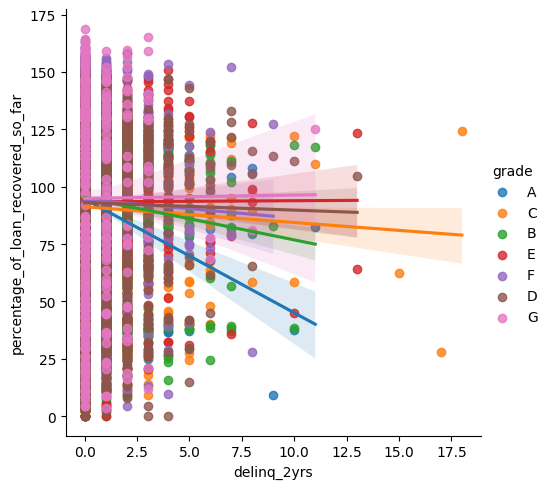

In [53]:
sns.lmplot(data=df, x='delinq_2yrs', y='percentage_of_loan_recovered_so_far', hue = 'grade')

Apparnetly not. Grade A has an outlier.

Is the purpose for the loan likely to have an effect?

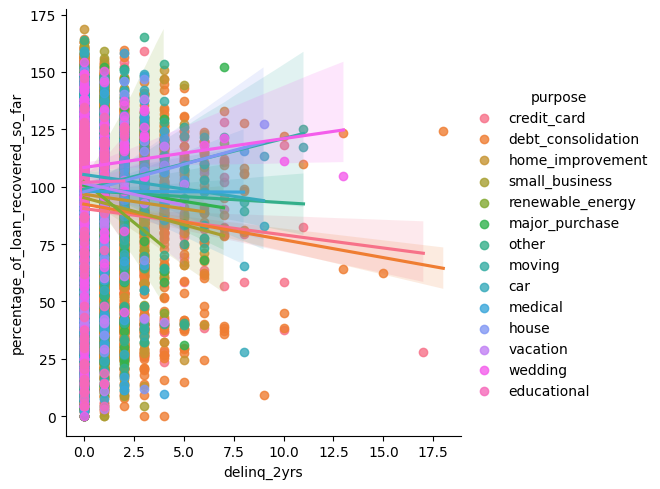

In [54]:
sns.lmplot(data=df, x='delinq_2yrs', y='percentage_of_loan_recovered_so_far', hue = 'purpose')

YEs, credit card purpose and debt consolidatino purpose appear to lead to late payments and nto recoverign 100% of the loan.

Does the home_ownership value contribute to the likelihood a customer won't pay?

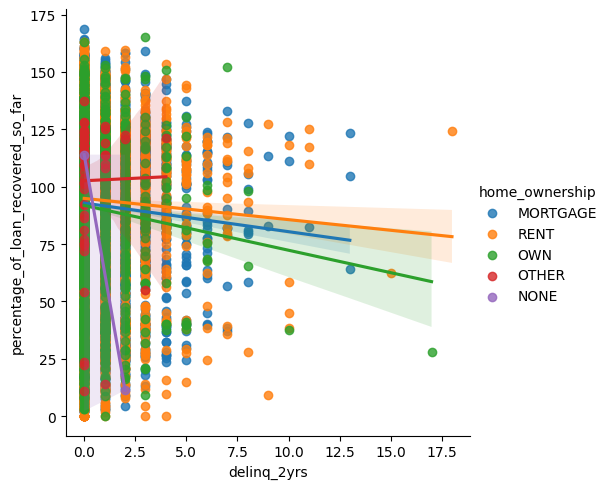

In [55]:
sns.lmplot(data=df, x='delinq_2yrs', y='percentage_of_loan_recovered_so_far', hue = 'home_ownership')

YEs, 

We make the analysis and determine the columns are contributing to loans not being paid off and visualise any interesting indicators.

In [4]:
import matplotlib.pyplot as plt

for column_name in df:
    # plt.figure(column_name)
    sns.lmplot(data=df, x='delinq_2yrs', y='percentage_of_loan_recovered_so_far', hue = column_name)
    plt.show(block=False)

Compare these indicators between loans already charged off and loans which could change to charged off to check if these same factors apply to loans which have the potential to change to "Charged Off".